In [53]:
# import the libraries needed
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

## Preparing the train and test dataset
---
- We have obtained the dataset from https://www.openpowerlifting.org/.
- For ease of data preprocessing, we have only taken data from the 'SBD' event where contestants are required to do all three exercises, namely Squat, Bench, Deadlift.
- From there, we randomised the data rows in the original CSV file and took out a total of 4,000 data points to be used for our train and test dataset. This dataset was further split into 3,000 for train and 1,000 for test.

In [16]:
train_test_combined = pd.read_csv('../datasets/train_test_combined.csv')
train_test_combined.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alana Carrasco,F,SBD,Raw,29.5,24-34,24-39,FR-O,68.60,72,...,Yes,USA,AZ,USAPL,IPF,27/8/2017,USA,AZ,NaN,Sun Devil Classic
1,Even Dysjaland,M,SBD,Raw,19.5,20-23,19-23,Juniors 19-23,94.65,105,...,Yes,NaN,NaN,NSF,IPF,13/6/2015,Norway,NaN,Ganddal,Klubbstevne
2,Alessandro Favorito,M,SBD,Single-ply,39.0,35-39,24-39,Open,89.40,90,...,Yes,Italy,NaN,FIPL,IPF,6/11/2004,Italy,NaN,Marina Di Carrara,Coppa Italia A Squadre
3,Sydney Martinez,F,SBD,Single-ply,NaN,NaN,NaN,Girls,55.16,56,...,Yes,USA,NaN,THSWPA,NaN,25/1/2014,USA,TX,JUNIOR HIGH,CARRIZO SPRINGS INVITATIONAL
4,Navy Villar,F,SBD,Single-ply,NaN,NaN,NaN,Girls,55.61,56,...,Yes,NaN,NaN,THSWPA,NaN,18/1/2018,USA,TX,Sadler,S&S Lady Rams Meet


In [17]:
# Split combined dataset into train and test
from sklearn.model_selection import train_test_split

train,test = train_test_split(train_test_combined, test_size = 0.25, random_state = 0)
train.to_csv('../datasets/train.csv', index = False)
test.to_csv('../datasets/test.csv', index = False)

print(train.shape)
print(test.shape)

(3000, 41)
(1000, 41)


## Exploratory Data Analysis (EDA)
---

In [18]:
# Import train dataset into a dataframe
train_df = pd.read_csv('../datasets/train.csv')
train_df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Hanne Bingle,F,SBD,Wraps,61.0,60-64,60-69,M5,73.70,75,...,NaN,UK,NaN,GPC,GPC,1/9/2020,Slovakia,NaN,Trnava,European Championships
1,Mohamed Reda,M,SBD,Raw,NaN,NaN,NaN,Open,99.58,105,...,Yes,Egypt,NaN,AfricanPF,IPF,20/10/2018,Morocco,NaN,Meknes,African & Arab Powerlifting Championships
2,Pauline Reeves,F,SBD,Single-ply,NaN,45-49,NaN,Open,129.30,90+,...,Yes,England,NaN,BAWLA,IPF,26/4/2003,UK,NaN,Livingstone,British Masters' Championships
3,Edie Montalvo,F,SBD,Single-ply,NaN,NaN,NaN,Girls,71.12,75,...,Yes,NaN,NaN,THSWPA,NaN,10/2/2018,USA,TX,Weslaco,Weslaco Girls Invitational Powerlifting Meet
4,Faith Bailey,F,SBD,Single-ply,NaN,NaN,NaN,Girls,78.83,82.3,...,Yes,NaN,NaN,THSWPA,NaN,7/3/2020,USA,TX,Bay City,Region 4 Division 3 Meet


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              3000 non-null   object 
 1   Sex               3000 non-null   object 
 2   Event             3000 non-null   object 
 3   Equipment         3000 non-null   object 
 4   Age               1704 non-null   float64
 5   AgeClass          1998 non-null   object 
 6   BirthYearClass    1816 non-null   object 
 7   Division          2998 non-null   object 
 8   BodyweightKg      2955 non-null   float64
 9   WeightClassKg     2968 non-null   object 
 10  Squat1Kg          1351 non-null   float64
 11  Squat2Kg          1334 non-null   float64
 12  Squat3Kg          1293 non-null   float64
 13  Squat4Kg          11 non-null     float64
 14  Best3SquatKg      2869 non-null   float64
 15  Bench1Kg          1334 non-null   float64
 16  Bench2Kg          1319 non-null   float64


### Identifying numeric and categorical variables
---
- Let's first identify numeric and categorical variables using information from above and the data's
description text.

In [21]:
# Identify numeric variables
numeric_df = train_df[['Age', 'BodyweightKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg',
                      'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg',
                      'Deadlift3Kg', 'Best3DeadliftKg', 'TotalKg', 'Wilks', 'Glossbrenner', 'Goodlift']]

categorical_df = train_df[['Sex', 'Equipment', 'AgeClass', 'BirthYearClass', 'Division', 'WeightClassKg', 
                          'Place', 'Country', 'State', 'Federation', 'ParentFederation']]

In [22]:
numeric_df.describe()

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Wilks,Glossbrenner,Goodlift
count,1704.000000,2955.000000,1351.000000,1334.000000,1293.000000,2869.000000,1334.000000,1319.000000,1287.000000,2844.000000,1326.000000,1300.000000,1242.000000,2828.000000,2814.000000,2775.000000,2775.000000,2773.000000
mean,28.166667,80.919797,112.584330,97.066387,30.874169,169.591042,85.195727,62.538431,-15.998819,107.292219,161.538469,137.320869,26.993760,184.916821,462.034023,346.214937,323.902822,64.162380
std,11.929664,21.835479,138.440295,162.382321,191.442886,70.974763,81.843312,108.230793,127.620094,52.661941,102.020644,149.747254,208.370629,66.036699,180.937825,82.314126,82.167457,15.814134
min,4.500000,25.300000,-400.000000,-430.910000,-426.380000,-255.000000,-310.000000,-265.350000,-340.500000,-185.000000,-295.000000,-399.160000,-365.000000,-190.000000,92.990000,111.060000,99.210000,18.570000
25%,19.000000,64.765000,85.000000,75.625000,-160.000000,112.500000,55.000000,42.500000,-125.000000,61.230000,122.500000,120.000000,-200.000000,130.000000,307.500000,289.155000,264.590000,53.170000
50%,24.500000,79.700000,145.000000,145.000000,107.500000,162.500000,100.000000,90.000000,-57.500000,104.330000,180.000000,177.500000,125.000000,185.000000,455.000000,345.830000,324.880000,64.520000
75%,34.500000,93.615000,200.000000,202.500000,190.000000,220.000000,135.000000,137.500000,107.500000,145.000000,222.500000,230.000000,205.000000,235.000000,597.242500,398.590000,377.830000,75.220000
max,80.500000,185.020000,401.430000,421.840000,439.980000,455.000000,280.000000,320.000000,294.840000,383.290000,387.820000,357.500000,360.000000,390.090000,1157.500000,704.440000,672.820000,121.050000


### Exploring variables regarding contestant's personal information
---

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


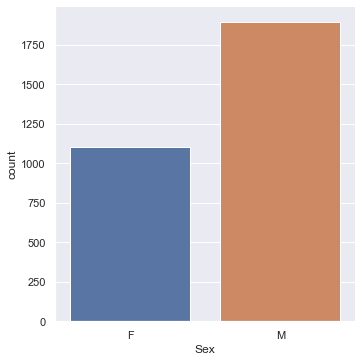

In [23]:
# Explore the distribution of the genders
sb.catplot('Sex', data = categorical_df, kind = 'count')

### Observation
---
There seems to be an imbalance in the no. of females to males, with female accounting only for 37% of datapoints. This could be a source of problem when building models later on that uses the variable `Sex`.

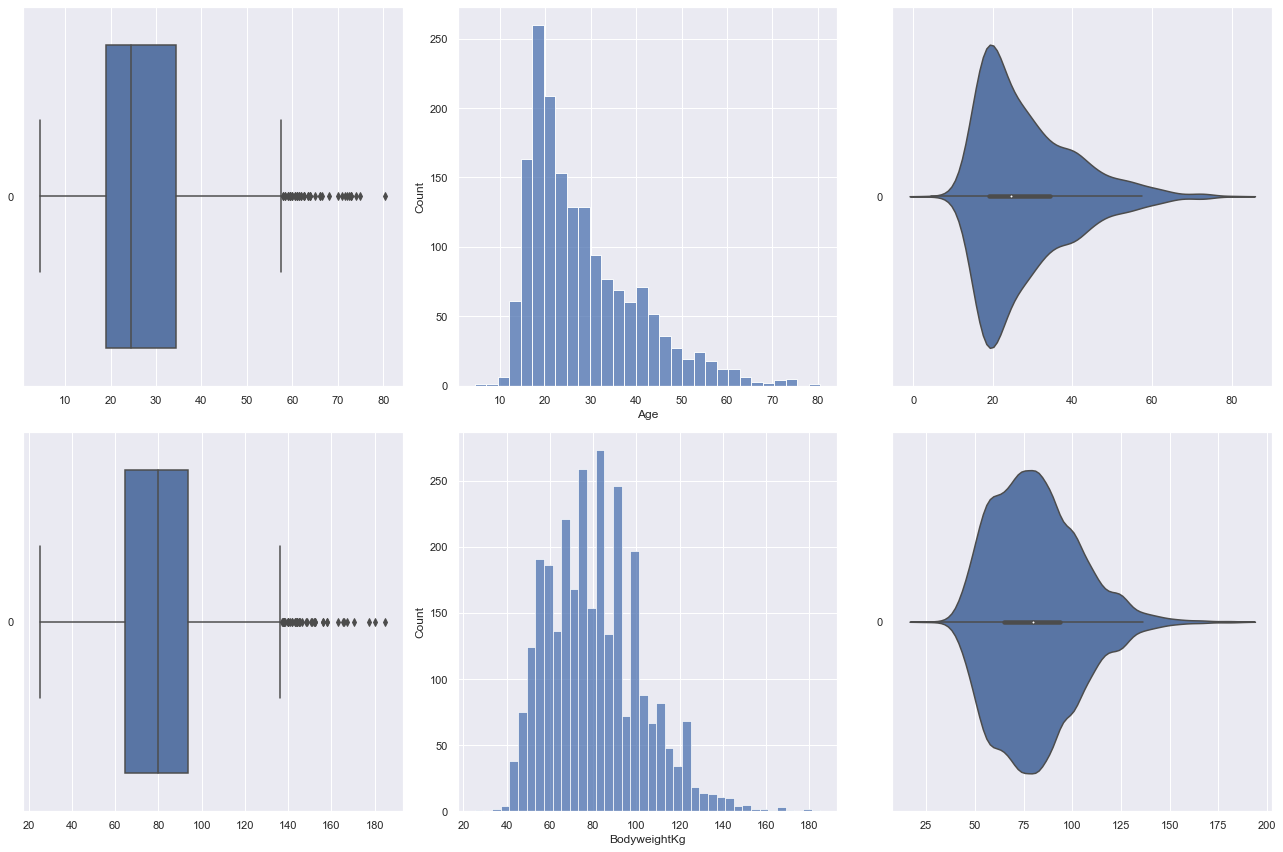

In [24]:
# Explore numeric variables related to a contestant's personal data: Age, BodyweightKg
f, axes = plt.subplots(2, 3, figsize = (18, 12))
numeric_personalData_df = numeric_df[['Age', 'BodyweightKg']]

count = 0

for var in numeric_personalData_df:
    sb.boxplot(data = numeric_personalData_df[var], orient = 'h', ax = axes[count, 0])
    sb.histplot(data = numeric_personalData_df[var], ax = axes[count, 1])
    sb.violinplot(data = numeric_personalData_df[var], orient = 'h', ax = axes[count, 2])
    count += 1
    
plt.tight_layout()

### Observation
---

#### Age:
- Considering box plot, seems that most powerlifters are young adults, from the age of 19 to 35, based on the interquartile range.
- Interestingly, there are quite a few outliers, that are above ~60 years old.
- How are the older powerlifters performing compared to their younger counterparts?
- From violin plot, distribution seems to be positively skewed.

#### BodyWeight (kg)
- Considering box plot, the majority of data seems to be concentrated within ~63 to 95kg.
- Some powerlifters seem to have a much higher weight, slightly less than double the median of 70kg.
- Is there a weight class for these outliers? 
- From violin plot, distribution seem to be less skewed.

### Exploring variables regarding weight lifted
---

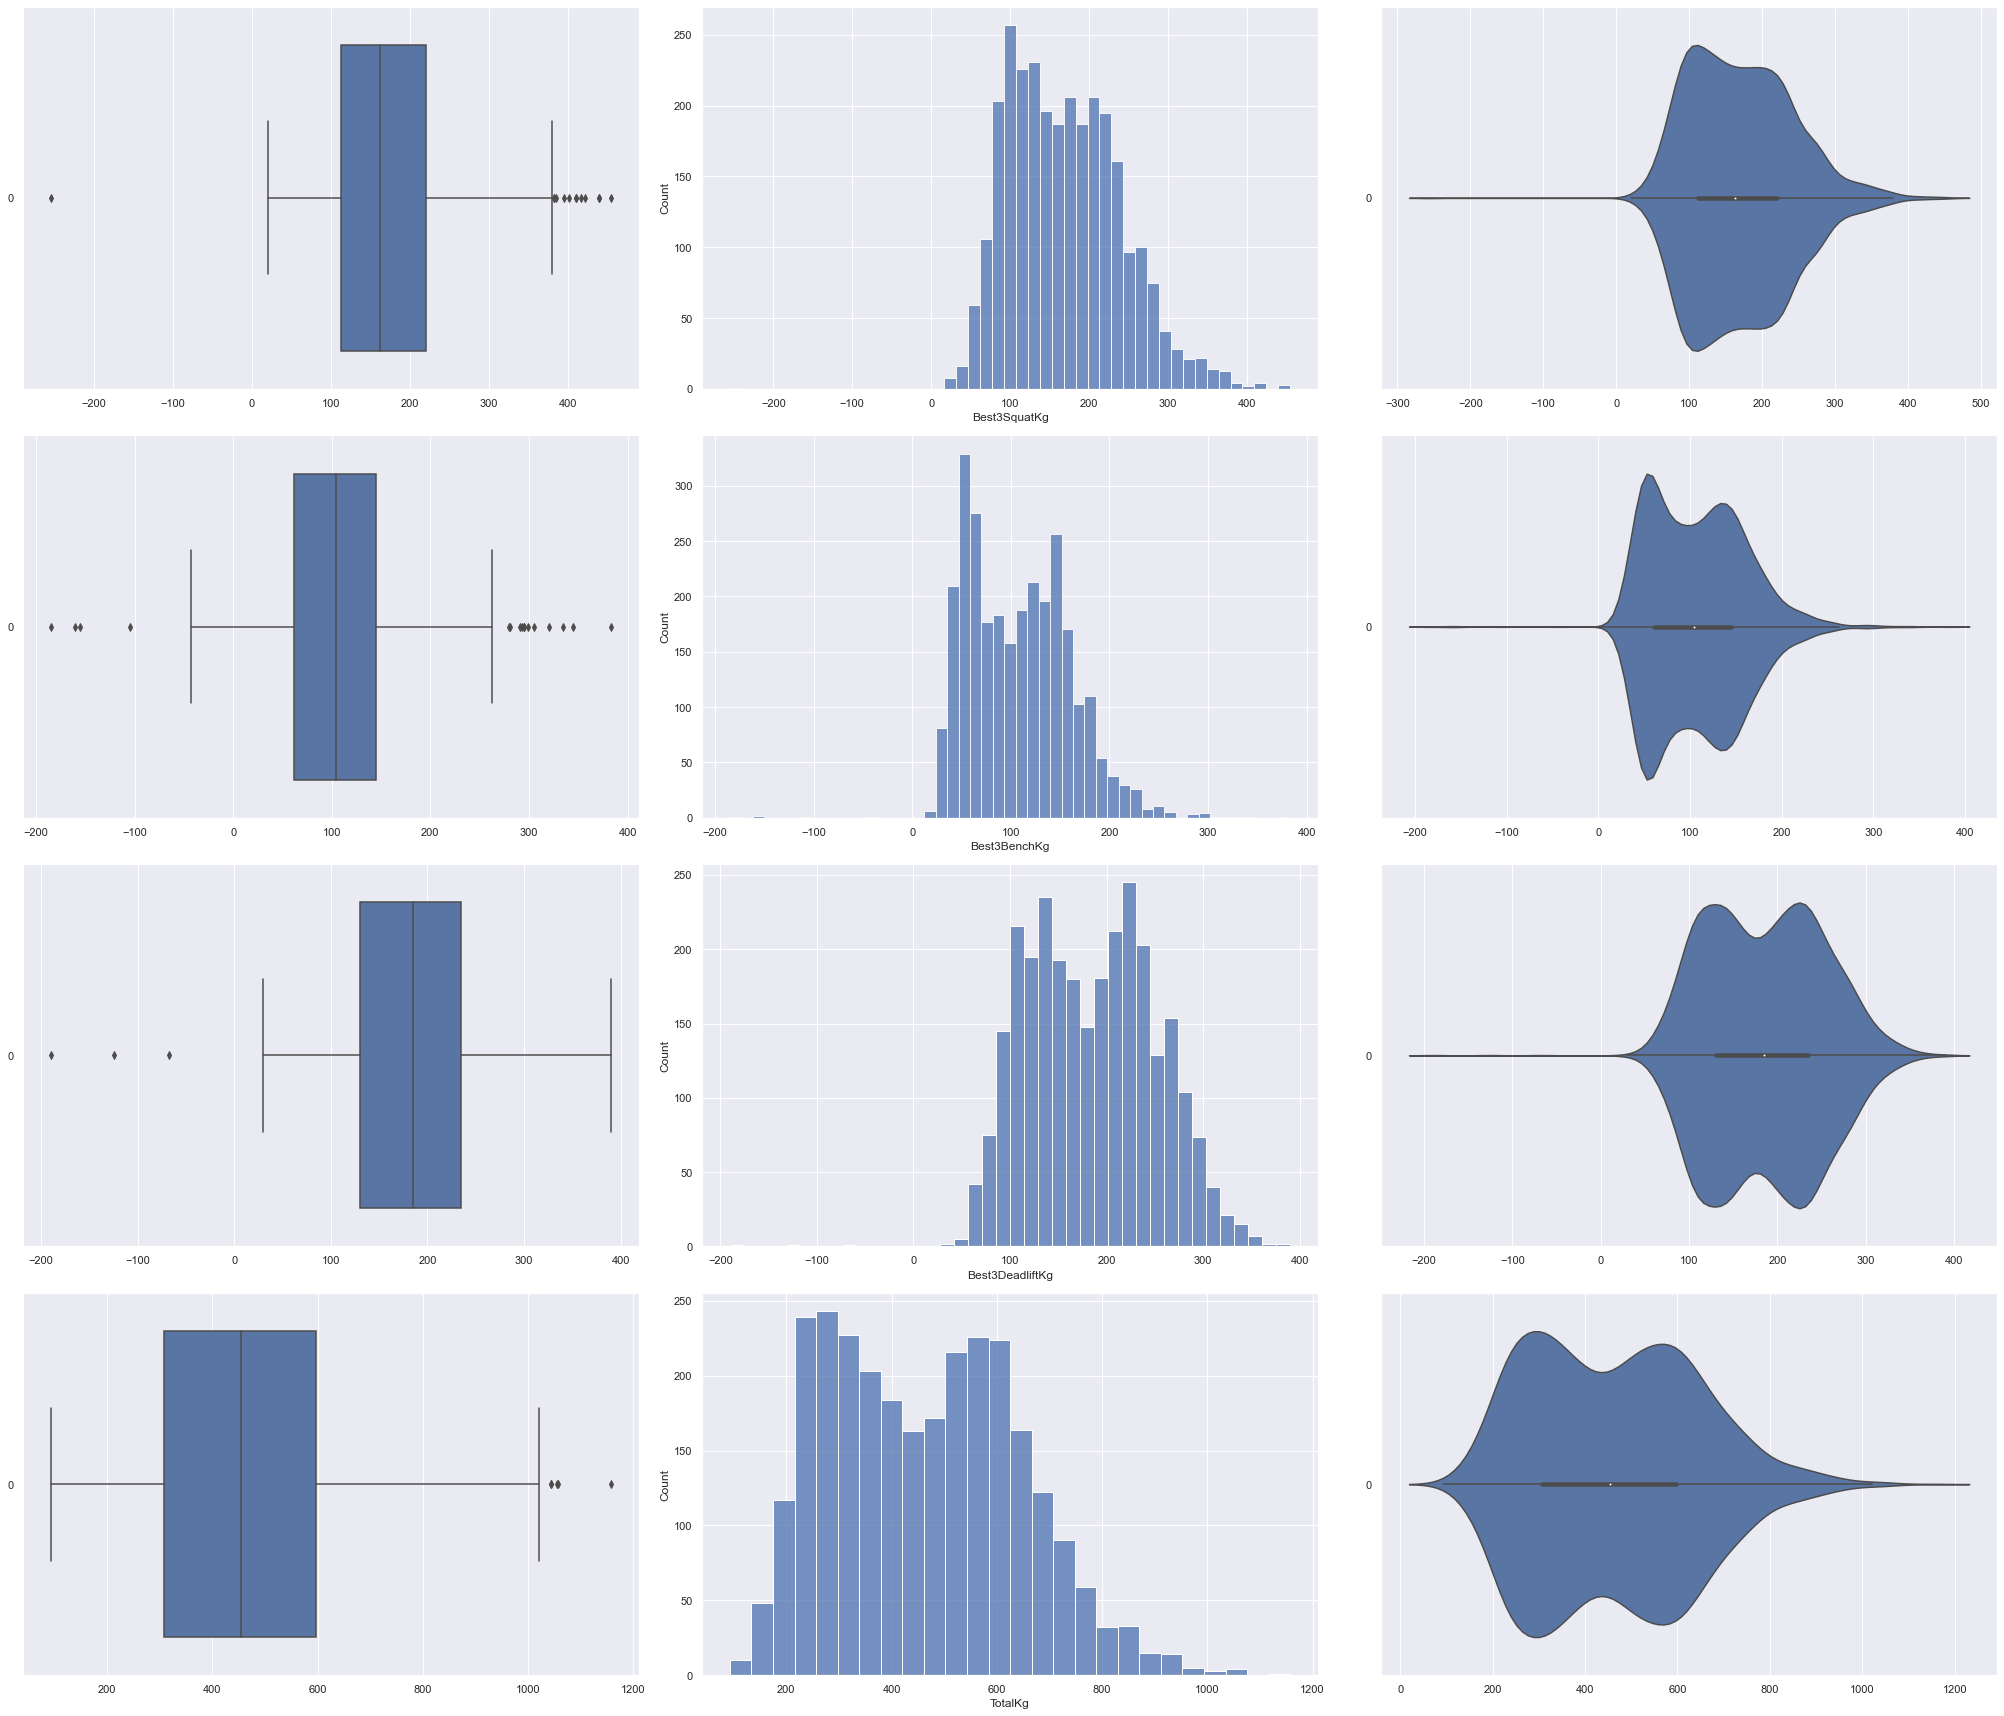

In [27]:
# For this section, we will use `Best3SquatKg`, `Best3BenchKg`, `Best3DeadliftKg` and `TotalKg`.
# TotalKg is the sum of `Best3SquatKg`, `Best3BenchKg`, and `Best3DeadliftKg`, if all three lifts were a success.

f, axes = plt.subplots(4,3, figsize = (28,24))
weightsLifted_df = numeric_df[['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'TotalKg']]

count = 0;
for var in weightsLifted_df:
    sb.boxplot(data = weightsLifted_df[var], orient = 'h', ax = axes[count, 0])
    sb.histplot(data = weightsLifted_df[var], ax = axes[count, 1])
    sb.violinplot(data = weightsLifted_df[var], orient = 'h', ax = axes[count, 2])
    count += 1

plt.tight_layout()

In [28]:
weightsLifted_df.skew()

Best3SquatKg       0.459744
Best3BenchKg       0.409997
Best3DeadliftKg    0.055482
TotalKg            0.354901
dtype: float64

### Observation
---
- For every exercise, there seems to have two values about which data is most concentrated about it, as seen by the violin plots having two peaks.
- Observing violin plots and the skewness, Squat exercise seems to have the greatest positive skewness from normal distribution.
- Scale seems to be disturbed by negative values for Squat and Bench, which represent failed Attempts.
- Let's remove these negative values and observe the distributions again.

No. of failed attempts for Squat:  1
No. of failed attempts for Bench:  5
No. of failed attempts for Deadlift:  3


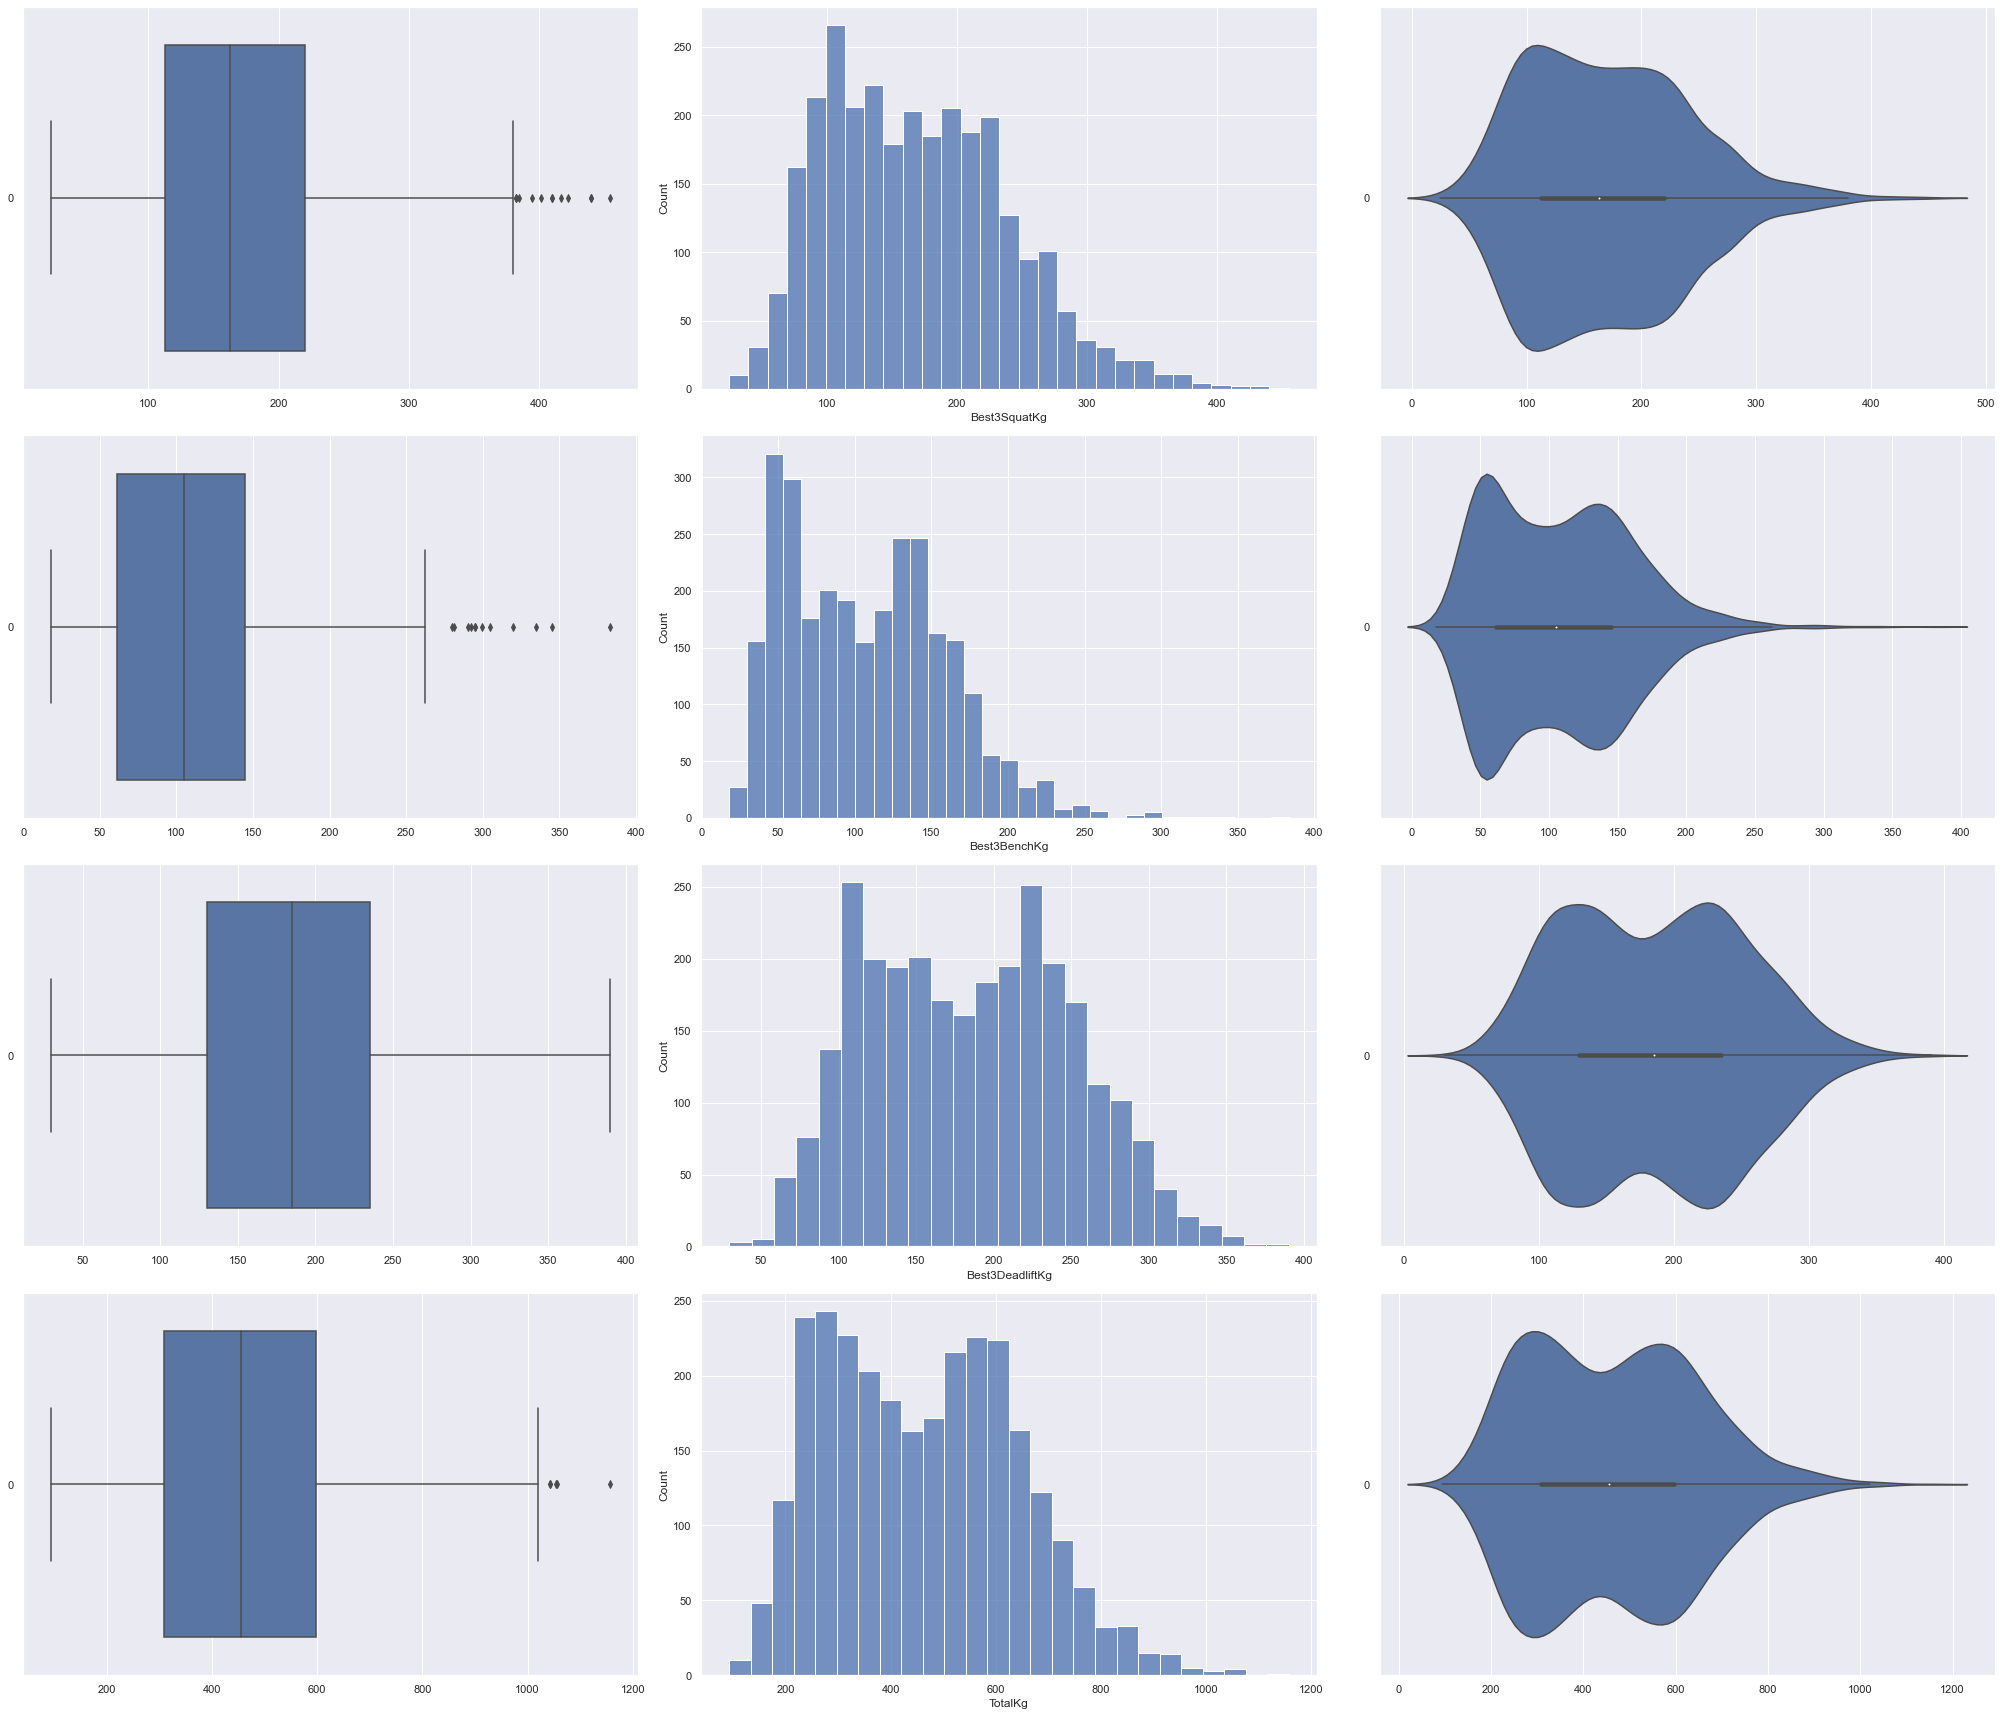

In [29]:
# Removing failed attempts data points
print("No. of failed attempts for Squat: ", weightsLifted_df[weightsLifted_df['Best3SquatKg'] < 0].shape[0])
print("No. of failed attempts for Bench: ", weightsLifted_df[weightsLifted_df['Best3BenchKg'] < 0].shape[0])
print("No. of failed attempts for Deadlift: ", weightsLifted_df[weightsLifted_df['Best3DeadliftKg'] < 0].shape[0])

failedAttempts = weightsLifted_df[(weightsLifted_df['Best3SquatKg'] < 0) 
                                  | (weightsLifted_df['Best3BenchKg'] < 0)
                                 | (weightsLifted_df['Best3DeadliftKg'] < 0)]
weightsLiftedSuccessOnly_df = weightsLifted_df.drop(index = failedAttempts.index, axis = 0)

# Replot visualisations
f, axes = plt.subplots(4,3, figsize = (28,24))

count = 0;
for var in weightsLifted_df:
    sb.boxplot(data = weightsLiftedSuccessOnly_df[var], orient = 'h', ax = axes[count, 0])
    sb.histplot(data = weightsLiftedSuccessOnly_df[var], ax = axes[count, 1])
    sb.violinplot(data = weightsLiftedSuccessOnly_df[var], orient = 'h', ax = axes[count, 2])
    count += 1

plt.tight_layout()

### Observation
---
- After removing failed attempts, concentration of data about the median seems to be more accurately displayed now.
- Squat seems to have the most number of outliers beyond the right whisker with the largest max value, followed by Bench and then Deadlift.
- Comparing interquartile ranges (IQR) for the three exercises, it seems that the IQR for Squat and Deadlift spreads over a larger range as compared to Bench. It is also noted that the distribution for Bench seem to be on the lighter side as compared to the other two exercises, where the third quartile for Bench is almost just slightly more than the first quartile of both Squat and Deadlift.
- On the other hand, deadlift seems to be on the heavier side as compared to the other two exercises. Is it easier to lift heavier weights with deadlift perhaps due to the muscles involved?
<br>
<br>

#### Possible Hunch
---
This may suggest that it is heavier to lift heavier weights while doing Bench as compared to the other two and the opposite seems to be suggested for Deadlift.

### Exploring Correlations between variables
---
- Not all events do all three exercises which means that not all events would record a `TotalKg` which is the sum of the best from each of the three exercises. For simplicity sake, let's explore only the events where all three exercises are done.
- Firstly, let's explore correlation between `TotalKg` lifted and the contestant's personal information.
- Next, let's explore correlation between `TotalKg` and other factors like `Equipment`, `Division`.
- Lastly, let's explore correlation between the three different exercises.

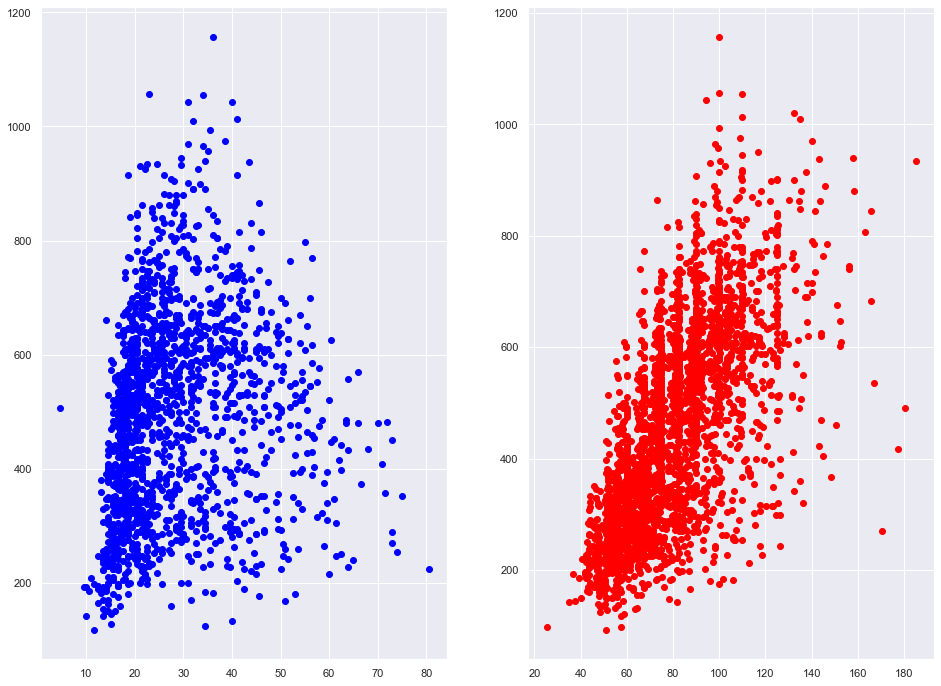

In [109]:
# For the first part, the variables used in exploration would be:
# Numeric: Age, BodyweightKg
correlationWithPersonal_df = train_df[['Age', 'BodyweightKg', 'Sex', 'Country', 'TotalKg']]

f, axes = plt.subplots(1, 2, figsize =(16,12))

axes[0].scatter(x = 'Age', y = 'TotalKg', data = correlationWithPersonal_df, color = 'blue')
axes[1].scatter(x = 'BodyweightKg', y = 'TotalKg', data = correlationWithPersonal_df, color = 'red')

<AxesSubplot:>

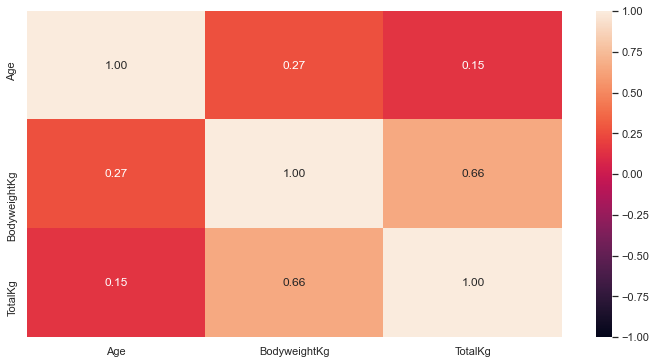

In [110]:
numericCorrelationWithPersonal_df = correlationWithPersonal_df[['Age' , 'BodyweightKg', 'TotalKg']]

f = plt.figure(figsize = (12, 6))
sb.heatmap(numericCorrelationWithPersonal_df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

### Observation
---

#### Age with TotalKg:
- From scatterplot and heatmap, there is a weak positive correlation of 0.15. However, this is different from what we would expect. We expect to observe a negative correlation between `Age` and `TotalKg`.
<br>
<br>

#### BodyweightKg with TotalKg:
- From scatterplot and heatmap, there is a moderately strong positive correlation of 0.66 between `BodyweightKg` and `TotalKg`. This may make it a useful variable for predicting `TotalKg` as a moderately strong linear relationship is suggested.

#### Possible Hunch
---
`BodyweightKg` seems to be a very important factor in predicting how much weight one can lift while for `Age`, getting older does not necessarily correlate to a decrease in weights lifted. At the same time, `Age` in general may not be that important in predicting how much weight one can lift.

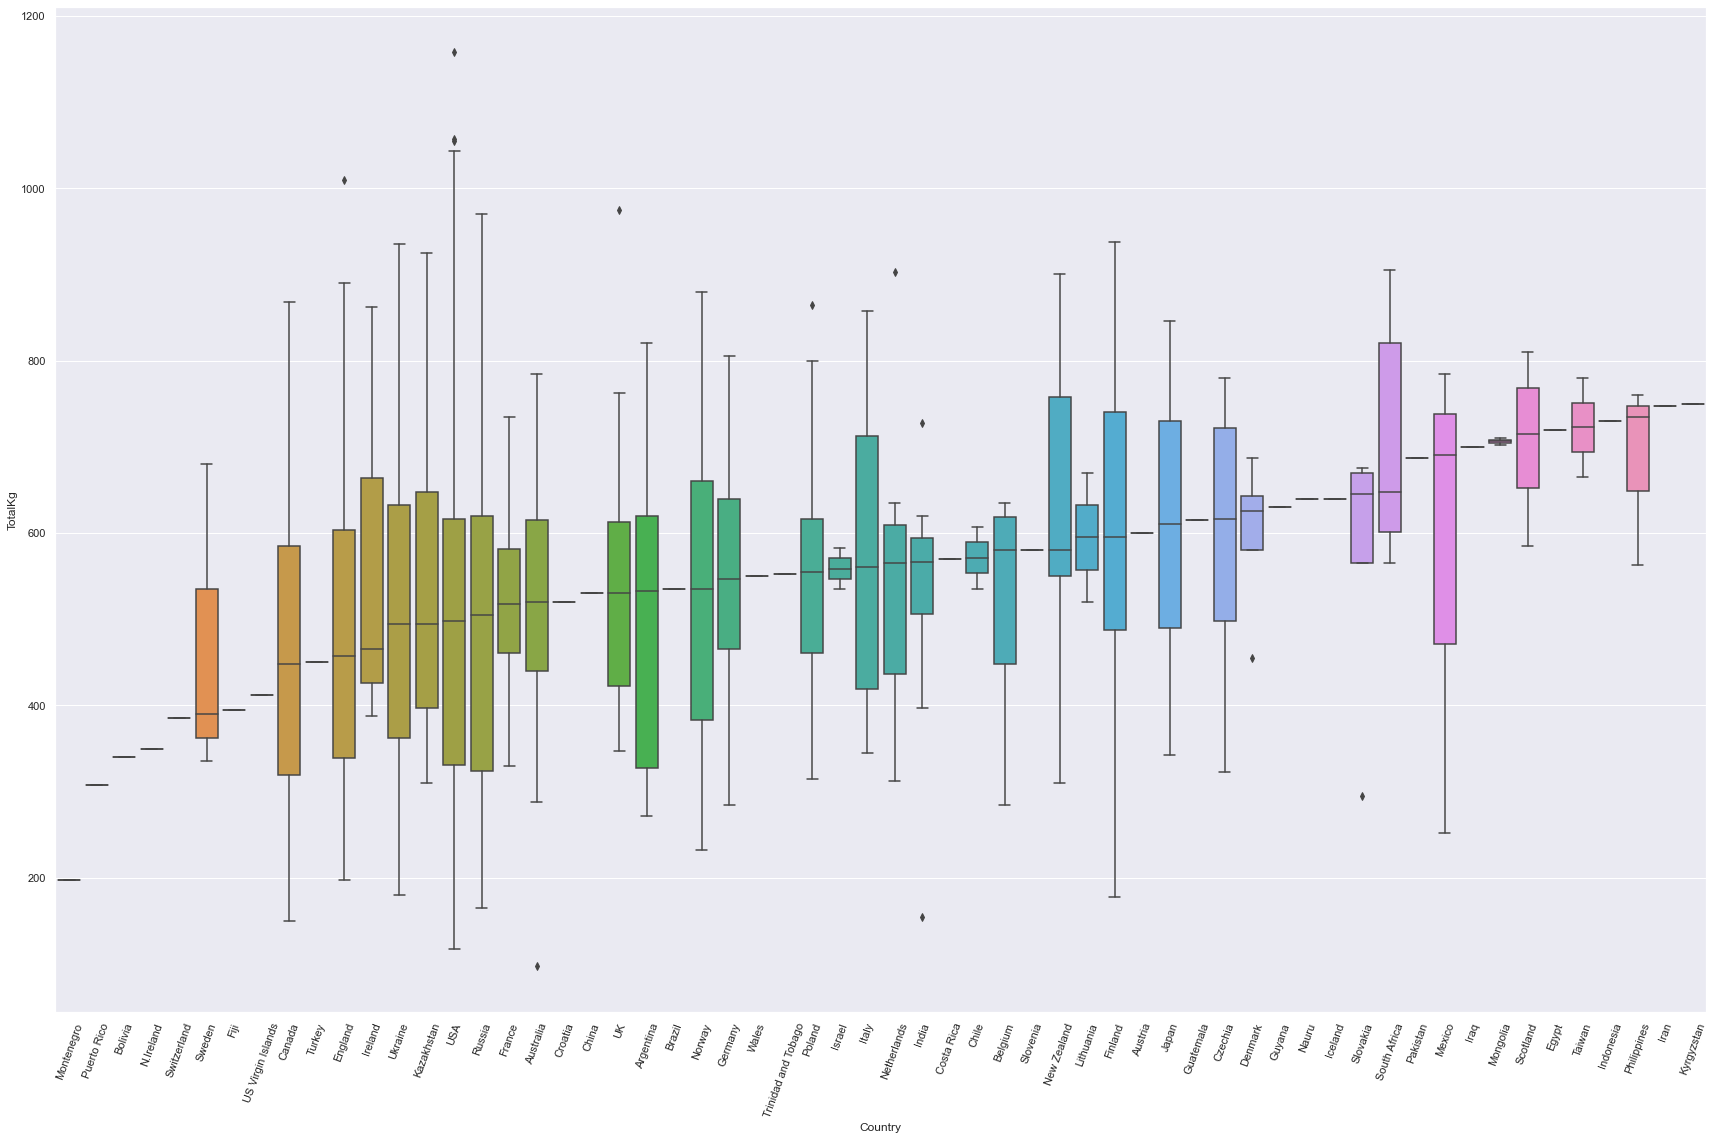

In [111]:
# Categorical: Sex, Country
# f, axes = plt.subplots(1, 2, figsize = (20,12))
f = plt.figure(figsize = (24, 16))


countryOrder = correlationWithPersonal_df.groupby(by = 'Country')['TotalKg'].median().sort_values().index
sb.boxplot(x = 'Country', y = 'TotalKg', data = correlationWithPersonal_df, order = countryOrder)

plt.xticks(rotation=70)
plt.tight_layout()

### Observation
---

#### Country with TotalKg:
- There seems to be differences between each country's boxplot. While there is a distinct increase in median across countries, most countries' interquartile range is large ~200 and this can cause a less distinct difference between each country's boxplot as there is a greater degree of overlap in boxplots.
- However, there seems to be too many countries which obstructs us from gaining meaningful insights. At the same time, there seem to be many countries with only a few contestants (i.e. those countries with a single horizontal line).
- For clearer insights, let's categorise these countries into the region they belong in.
- Regions used would be: North America, Central America, South America, Africa, Europe, Middle East, Asia and Oceania.

In [112]:
# There seems to be a wide range of countries contestant comes from. Let's observe how many unique countries
# are represented
print("No of unique countries: ", len(correlationWithPersonal_df['Country'].value_counts()))
correlationWithPersonal_df['Country'].value_counts()

No of unique countries:  60


USA                    805
Russia                 144
Canada                 124
England                 81
Ukraine                 62
Germany                 39
Norway                  35
Finland                 32
Australia               21
UK                      17
Czechia                 13
Poland                  12
Italy                   10
Japan                    9
Kazakhstan               9
New Zealand              9
South Africa             8
India                    8
Belgium                  7
Netherlands              7
Argentina                5
Slovakia                 5
Denmark                  5
Sweden                   4
Scotland                 4
France                   4
Mexico                   3
Philippines              3
Ireland                  3
Mongolia                 2
Lithuania                2
Austria                  2
N.Ireland                2
Israel                   2
Taiwan                   2
Chile                    2
China                    1
U

In [113]:
# First, let's replace NaN values with 'No country'
correlationWithPersonal_df['Country'].fillna('No Country', inplace = True)
correlationWithPersonal_df['Country'].value_counts()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


No Country    1474
USA            805
Russia         144
Canada         124
England         81
              ... 
Guatemala        1
Montenegro       1
Turkey           1
Brazil           1
Iraq             1
Name: Country, Length: 61, dtype: int64

In [114]:
# Due to large number of European countries, european countries are not listed here
# Any countries that are not listed here are european countries
northAmericaCountries = ['USA', 'Canada', 'US Virgin Islands', 'Puerto Rico']
centralAmericaCountries = ['Mexico', 'Costa Rica', 'Guatemala']
southAmericaCountries = ['Argentina', 'Chile', 'Trinidad and Tobago', 'Puerto Rico', 'Bolivia',
                         'Guyana', 'Brazil']
africaCountries = ['South Africa', 'Egypt']
middleEastCountries = ['Iran', 'Israel', 'Iraq']
asiaCountries = ['Japan', 'Kazakhstan', 'India', 'Philippines', 'Mongolia', 'Taiwan', 'China',
                 'Pakistan', 'Kyrgyzstan', 'Indonesia']
oceaniaCountries = ['Australia', 'New Zealand', 'Fiji', 'Nauru']

In [115]:
# Function to cluster countries by region
def getRegion(value):
    
    if value == 'No Country':
        return np.NaN
    
    elif value in northAmericaCountries:
        return 'North America'
    
    elif value in centralAmericaCountries:
        return 'Central America'
    
    elif value in southAmericaCountries:
        return 'South America'
    
    elif value in africaCountries:
        return 'Africa'
    
    elif value in middleEastCountries:
        return 'Middle East'
    
    elif value in asiaCountries:
        return 'Asia'
    
    elif value in oceaniaCountries:
        return 'Oceania'
    
    else:
        return 'Europe'

In [116]:
# Next, let's create a new column based of their region
correlationWithPersonal_df['Region'] = correlationWithPersonal_df['Country'].apply(lambda value : getRegion(value))
correlationWithPersonal_df['Region'].value_counts()

<ipython-input-116-f49edfc16073>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlationWithPersonal_df['Region'] = correlationWithPersonal_df['Country'].apply(lambda value : getRegion(value))


North America      931
Europe             497
Asia                37
Oceania             32
South America       11
Africa               9
Central America      5
Middle East          4
Name: Region, dtype: int64

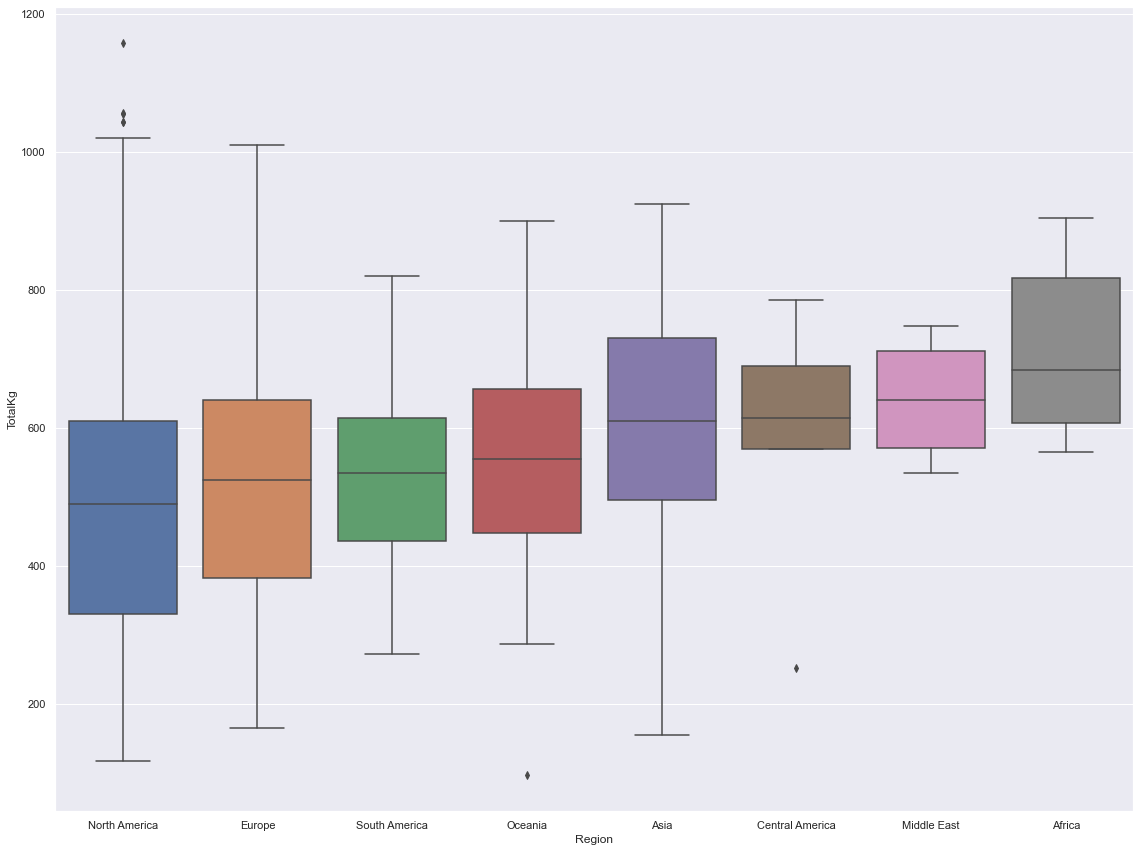

In [96]:
# Finally, let's plot boxplot for TotalKg across Regions
f = plt.figure(figsize = (16, 12))

regionOrder = correlationWithPersonal_df.groupby(by = 'Region')['TotalKg'].median().sort_values().index
sb.boxplot(x = 'Region', y = 'TotalKg', data = correlationWithPersonal_df, order = regionOrder)

plt.tight_layout()

<AxesSubplot:xlabel='Sex', ylabel='TotalKg'>

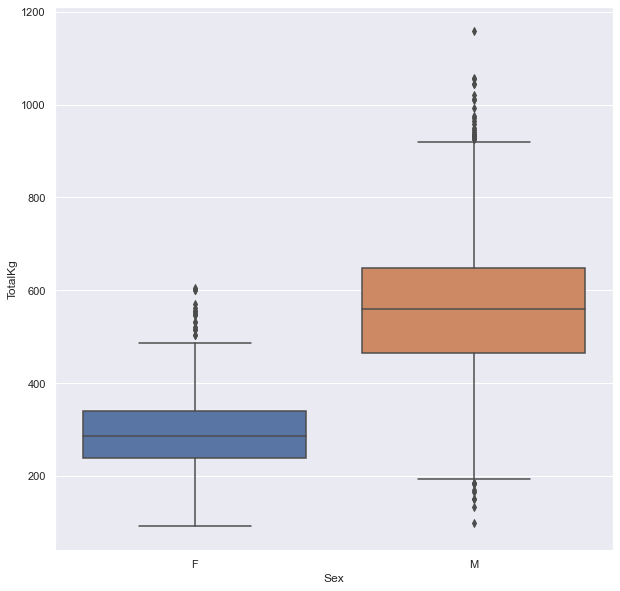

In [97]:
f = plt.figure(figsize = (10,10))

sexOrder = correlationWithPersonal_df.groupby(by = 'Sex')['TotalKg'].median().sort_values().index

sb.boxplot(x = 'Sex', y = 'TotalKg', data = correlationWithPersonal_df, order = sexOrder)

### Observation
---

#### Region with TotalKg:
- There seems to be a moderate correlation between a contestant's `Region` and `TotalKg`. This is seen by the distinct increase in `TotalKg`'s median and there is indeed noticeable differences between each region's boxplot, albeit some degree of overlap in boxplots.
- For North America and Europe where most of the datapoints lies in, there does not seem to have any distinct difference in each region's boxplot.
- However, it is important to take note that there is an imbalance of data points as regions such as Middle East have only 4 datapoints while regions such as North America have 931 data points.
<br>
<br>

#### Sex with TotalKg:
- There is a noticeable difference between Female and Male as seen by the clear difference in boxplot for each gender. For example, median of Male is larger than the Female's third Quartile by a considerable amount of ~50kg. Judging from boxplot alone, it seems that there is a stronger correlation between `Sex` and `TotalKg` than `Region` and `TotalKg`. However, this observation may be biased due to gender having much lesser categories resulting in a much simpler boxplot plot.

#### Possible Hunch
--- 
Overall, there seems to be a noticeable correlation between `Region` and `TotalKg` and `Sex` and `TotalKg` with `Sex` showing a much stronger correlation. Hence, it would seem that `Sex` is a very important factor when predicting `TotalKg`. However, there is a need to take note of the data imbalance especially for `Region` and this may affect the truth of the findings here.

In [99]:
# Next, let's look into the correlation between TotalKg and other factors like `Equipment` and `Division`
# Let's explore the correlation between division and TotalKg
correlationWithEventSpecific_df = train_df[['Equipment', 'Division', 'TotalKg']]

# First find out how many divisions are there
print("No. of unique divisions: ", len(correlationWithEventSpecific_df['Division'].value_counts()))
correlationWithEventSpecific_df['Division'].value_counts()

No. of unique divisions:  387


Open         819
Girls        500
MR-O         136
Juniors      122
FR-O          71
            ... 
retrownov      1
F_OR_AAPF      1
F_JR_WPC       1
Boys           1
M-M3b          1
Name: Division, Length: 387, dtype: int64

In [100]:
# To get a more meaningful comparison, let's consider only divisions that have 50 or more data rows
divisionFreq = correlationWithEventSpecific_df['Division'].value_counts()
selectedDivisionsIndex = divisionFreq[divisionFreq > 50].index
selectedData = correlationWithEventSpecific_df[correlationWithEventSpecific_df['Division'].isin(selectedDivisionsIndex)]

# Verify our filtering
selectedData['Division'].value_counts()

Open           819
Girls          500
MR-O           136
Juniors        122
FR-O            71
Sub-Juniors     68
Name: Division, dtype: int64

<AxesSubplot:xlabel='Division', ylabel='TotalKg'>

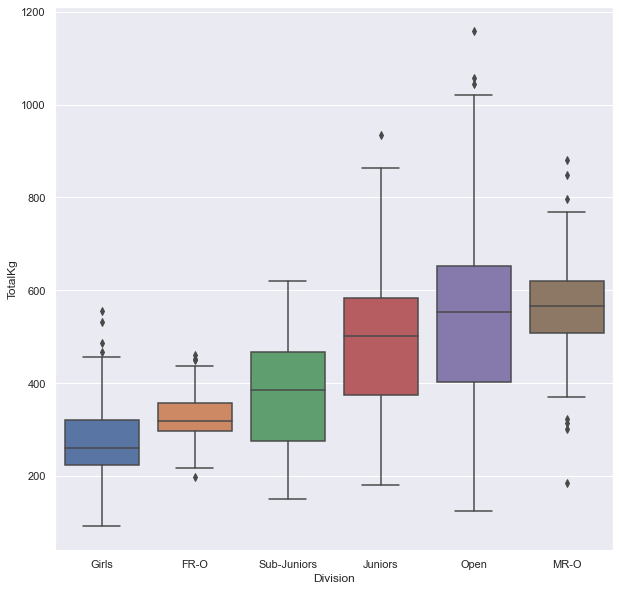

In [101]:
# Let's find out the correlation between TotalKg and Division
f = plt.figure(figsize = (10,10))

divisionOrder = selectedData.groupby(by = 'Division')['TotalKg'].median().sort_values().index
sb.boxplot(x = 'Division', y = 'TotalKg', data = correlationWithEventSpecific_df, order = divisionOrder)

<AxesSubplot:xlabel='Equipment', ylabel='TotalKg'>

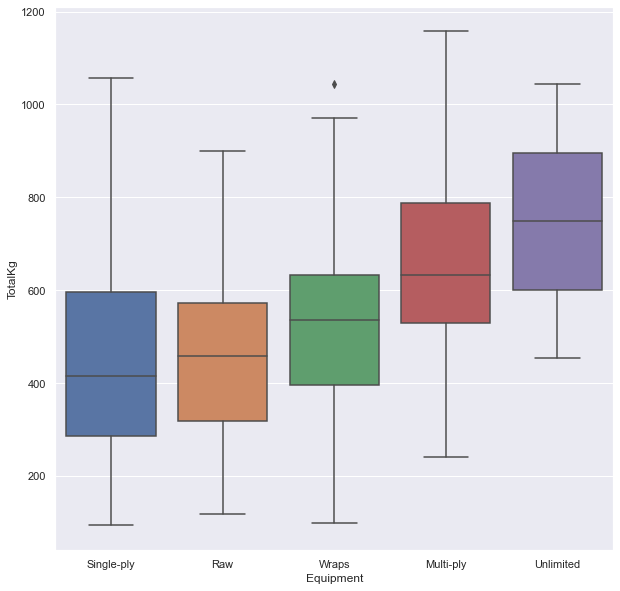

In [102]:
# First, let's explore correlation with `Equipment`
f = plt.figure(figsize = (10, 10))

equipmentOrder = correlationWithEventSpecific_df.groupby(by = 'Equipment')['TotalKg'].median().sort_values().index
sb.boxplot(x = 'Equipment', y = 'TotalKg', data = correlationWithEventSpecific_df, order = equipmentOrder)

### Observation
---

#### Division with TotalKg:
- There do seem to be a strong correlation between `Division` and `TotalKg` as seen by most categories having a distinct boxplot different from the rest. 
- The Girls division's boxplot seem to show noticeable difference from the rest with the median for other categories being equal or greater than the Girl's division third quartile. This reinforces the previous notion that `Sex` does play a significant role in affecting `TotalKg`.
- Interestingly, the Juniors division's distribution has significant overlap with the Open division and seems to be more towards heavier weights than Sub-Juniors.
<br>
<br>
- There seems to be a few surprises within distribution that are worth exploring.
    - We would expect the Junior's division to lift lighter weights than those in the Open division. However, Juniors division's distribution seem to share great similarities with that of Open. However, this boxplot may not be entirely accurate as Juniors division have much less datapoints than Open division (122 compared to 819)
    - Let's also explore the differences between Sub-Juniors and Juniors
<br>
<br>

##### Followup:
- Let's look at the `Age` and `BodyweightKg` for Junior, Open and Sub-Juniors division.
<br>
<br>

#### Equipment with TotalKg:
- Overall, the boxplot for each kind of equipment seems to show a great extent of overlap, suggesting no correlations between `Equipment` and `TotalKg`. However, the boxplot for Multi-ply and Unlimited seem to be distinctly different from the rest which is worth exploring.

In [106]:
# Lets plot the distribution for Age and BodyweightKg for these 4 categories

juniorsDivision_df = train_df[(train_df['Division'] == 'Juniors')]
openDivision_df = train_df[(train_df['Division'] == 'Open')]
subJuniorsDivision_df = train_df[(train_df['Division'] == 'Sub-Juniors')]

chosenDivisions_df = [subJuniorsDivision_df, juniorsDivision_df, openDivision_df]

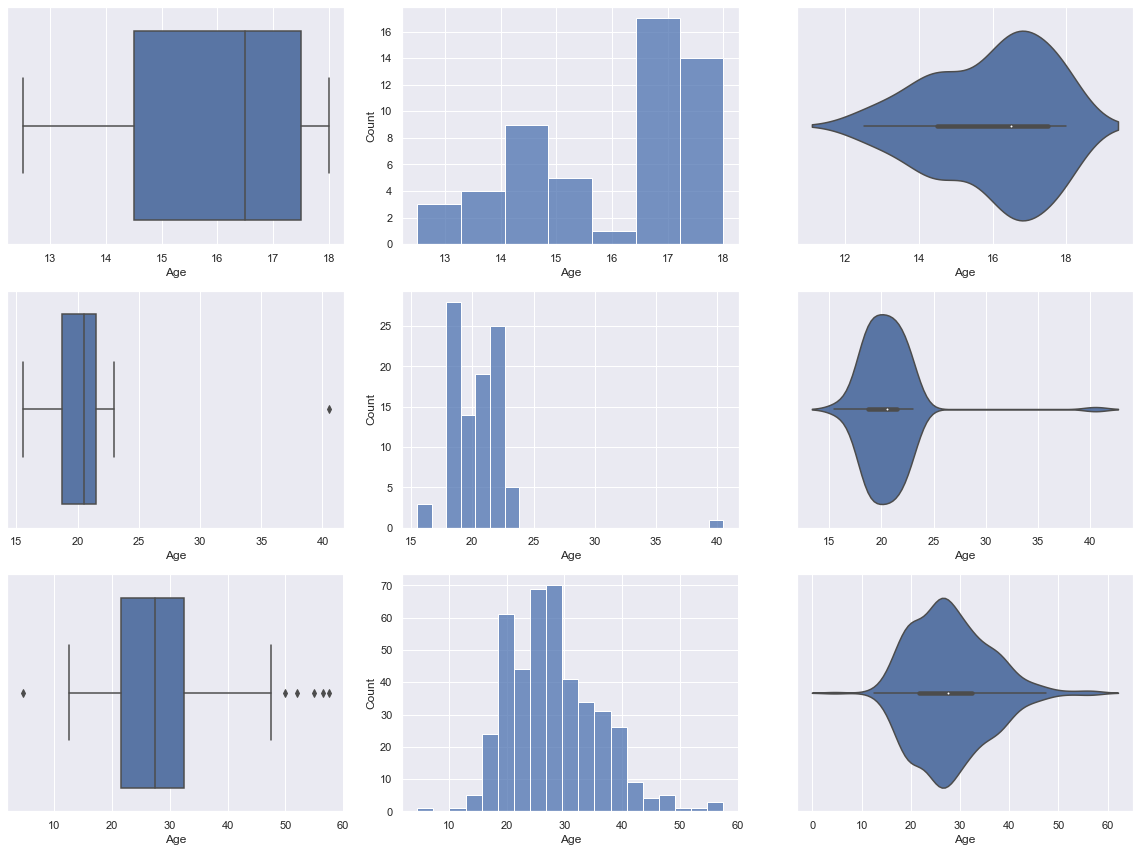

In [107]:
f, axes = plt.subplots(3, 3, figsize = (16,12))

count = 0
for df in chosenDivisions_df:
    sb.boxplot(x = 'Age', data = df, orient = 'h', ax = axes[count, 0])
    sb.histplot(x = 'Age', data = df, ax = axes[count, 1])
    sb.violinplot(x = 'Age', data = df, orient = 'h', ax = axes[count, 2])
    count += 1
    
plt.tight_layout()

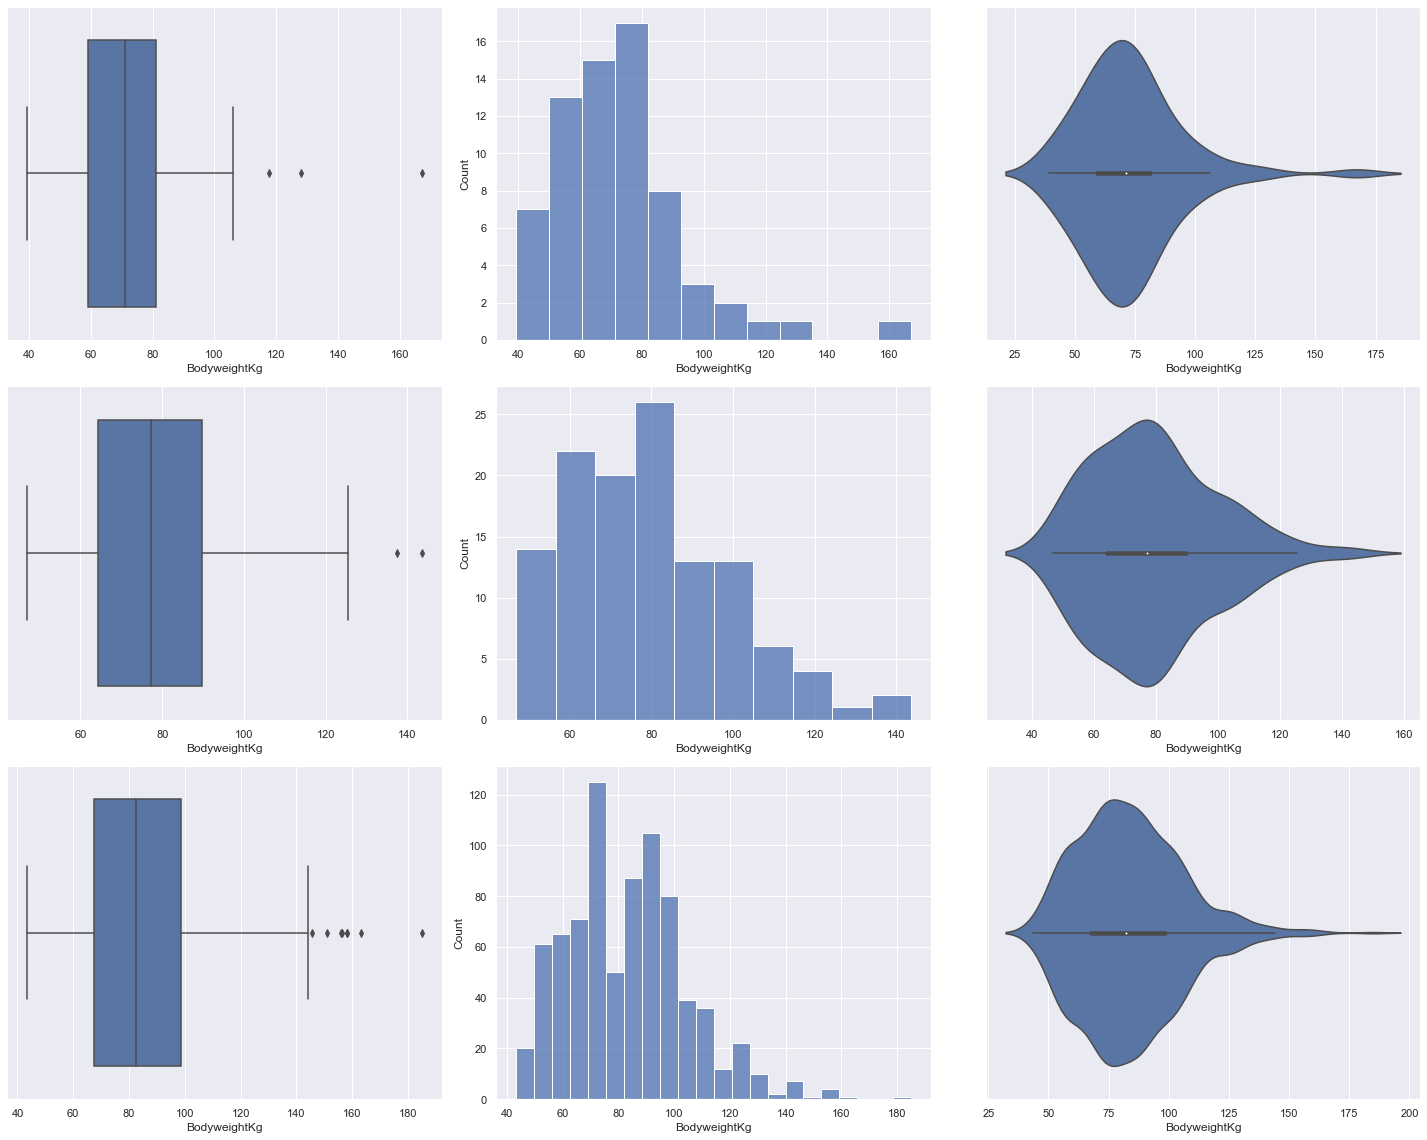

In [108]:
f, axes = plt.subplots(3, 3, figsize = (20,16))

count = 0
for df in chosenDivisions_df:
    sb.boxplot(x = 'BodyweightKg', data = df, orient = 'h', ax = axes[count, 0])
    sb.histplot(x = 'BodyweightKg', data = df, ax = axes[count, 1])
    sb.violinplot(x = 'BodyweightKg', data = df, orient = 'h', ax = axes[count, 2])
    count += 1
    
plt.tight_layout()

### Observation
---

#### Age across Divisions:
- Sub Junior division seems to cater for teenagers, while Junior seem to cater to young adults and Open seems to cater for matured adults. There is a very distinct difference in age distribution as seen by the vastly different boxplots. However, there seems to be some overlap in the age distribution for Open division and the other two division but not vice versa.
- As for skewness of distribution, Sub Junior division has a high negative skew while for Open division, there seems to be a positive skew. Ignoring the outlier in Junior division, the division does not seem to have an obvious skew.
<br>
<br>

#### BodyweightKg across Divisions:
- Comparing Junior and Open division, it seems that the bodyweightKg for Juniors on average, seem to be lighter than those in the Open division, as seen by Junior division having lower quartiles values. Sub Junior division distinctly has the lightest weight on average.
- In all of the divsions, there seems to be a positive skew caused by a few outliers who have very high bodyweights.
<br>
<br>

### Possible Hunch
---
The main variable that distinguish Juniors from other categories is their `Age`, alongside with the fact that a lower bodyweight may put them at a slight disadvantage. This is because we identified that `BodyweightKg` and `TotalKg` have a strong positive correlation earlier. Also, based on the previous boxplot with `Division` against `TotalKg`, the distribution of weights that contestants in the Junior division are able to lift are comparable with those in the Open division as seen by similarities in both boxplot for each division. Combining this two factors, it seems that `Age` is quite an important factor in determining how much one can lift.